<a href="https://colab.research.google.com/github/nickgithubaccaunt/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%A0%D0%BE%D0%B3%D0%B0%D0%BD%D0%BE%D0%B2_%D0%9D_%D0%9C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [33]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### 1.2. Проектируем архитектуру для этой задачи

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
# Определяем архитектуру нейронной сети
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(data.shape[1],)),  # Входной слой
    layers.Dense(32, activation="relu"),  # Скрытый слой 1
    layers.Dense(16, activation="relu"),  # Скрытый слой 2
    layers.Dense(1)  # Выходной слой (предсказание цены)
])

# Компиляция модели
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Выводим сводку модели
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [36]:
# Используем среднеквадратичную ошибку (MSE) в качестве функции потерь,
# так как это задача регрессии. В качестве метрики - среднюю абсолютную ошибку (MAE).

model.compile(
    optimizer="adam",    # Оптимизатор Adam
    loss="mse",          # Функция потерь: среднеквадратичная ошибка (MSE)
    metrics=["mae"]      # Метрика: средняя абсолютная ошибка (MAE)
)

print("Модель успешно скомпилирована!")


Модель успешно скомпилирована!


#### 1.4. Обучаем модель ИНС

In [38]:
from sklearn.model_selection import train_test_split

In [37]:
# Разделяем данные на обучающую и тестовую выборки (80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Обучаем модель
history = model.fit(
    X_train, y_train,        # Обучающие данные
    validation_data=(X_test, y_test),  # Валидационные данные
    epochs=100,              # Количество эпох
    batch_size=16,           # Размер батча
    verbose=1                # Вывод процесса обучения
)

print("Модель успешно обучена!")

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 922.4763 - mae: 22.3842 - val_loss: 82.8554 - val_mae: 7.2653
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 107.1399 - mae: 7.2901 - val_loss: 57.5124 - val_mae: 5.2507
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.1321 - mae: 5.6603 - val_loss: 55.8260 - val_mae: 5.3663
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59.2014 - mae: 5.7066 - val_loss: 51.9521 - val_mae: 5.4330
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 66.0435 - mae: 5.5913 - val_loss: 46.9469 - val_mae: 4.9211
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.5378 - mae: 5.4196 - val_loss: 50.7657 - val_mae: 5.6605
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.8638 - mae: 5.7646 - val_loss: 45.2279 - val_mae: 5.0765
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.5437 - mae: 5.4963 - val_loss: 47.2341 - val_mae: 4.3892
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6m

#### 1.6. Делаем предсказания на тестовых данных

In [39]:
import matplotlib.pyplot as plt

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


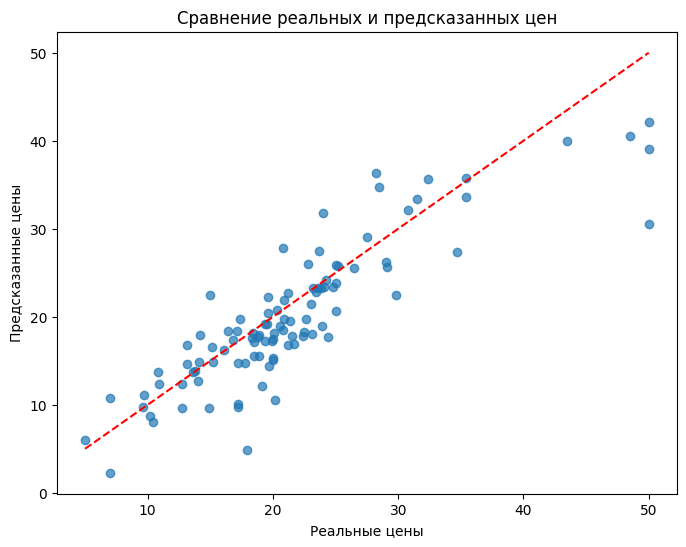

In [40]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Реальные цены")
plt.ylabel("Предсказанные цены")
plt.title("Сравнение реальных и предсказанных цен")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Линия идеального совпадения
plt.show()

#### 1.7. Вычисляем метрику качества на тестовых данных

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Рассчитываем MAE, MSE и R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

Средняя абсолютная ошибка (MAE): 3.18
Среднеквадратичная ошибка (MSE): 19.86
Коэффициент детерминации (R²): 0.73


#### 1.8. Строим график обучения

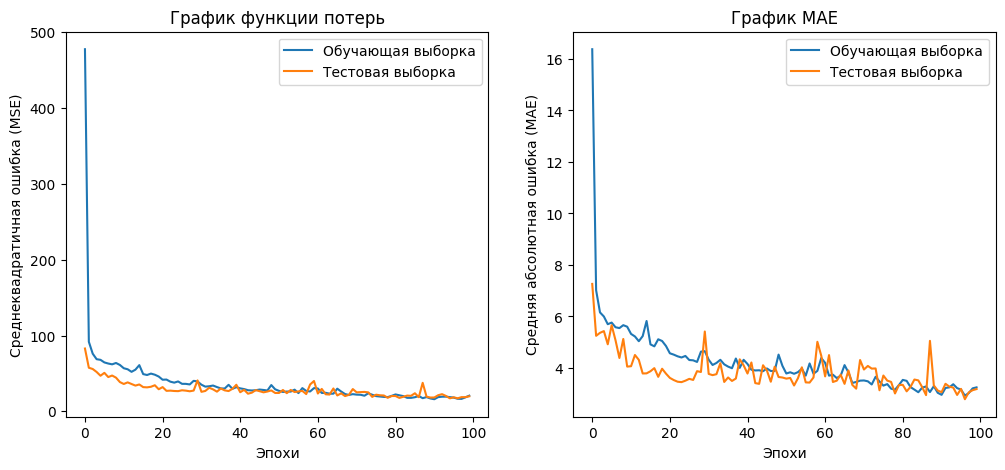

In [42]:
plt.figure(figsize=(12, 5))

# График функции потерь (MSE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Обучающая выборка")
plt.plot(history.history['val_loss'], label="Тестовая выборка")
plt.xlabel("Эпохи")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.title("График функции потерь")
plt.legend()

# График MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label="Обучающая выборка")
plt.plot(history.history['val_mae'], label="Тестовая выборка")
plt.xlabel("Эпохи")
plt.ylabel("Средняя абсолютная ошибка (MAE)")
plt.title("График MAE")
plt.legend()

plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [43]:
!pip install gradio

In [44]:
import gradio as gr

# Функция для предсказания цены
def predict_price(*features):
    features = np.array(features).reshape(1, -1)  # Преобразуем в нужную форму
    prediction = model.predict(features)
    return f"Предсказанная цена: {prediction[0][0]:.2f} тыс. долларов"

feature_descriptions = [
    ("CRIM", "Уровень преступности в районе (0.1 - низкий, 10 - высокий)", 0.1),
    ("ZN", "Доля земли под жилую застройку (%) (0 - нет, 25 - среднее)", 25),
    ("INDUS", "Доля акров под нежилое строительство (5 - мало, 25 - много)", 5),
    ("CHAS", "Район у реки Чарльз (0 - нет, 1 - да)", 0),
    ("NOX", "Концентрация оксида азота (0.4 - низкая, 0.7 - высокая)", 0.5),
    ("RM", "Среднее число комнат в доме (4 - мало, 8 - много)", 6.5),
    ("AGE", "Доля старых домов (%) (10 - новые, 100 - старые)", 50),
    ("DIS", "Расстояние до деловых центров (1 - близко, 10 - далеко)", 4),
    ("RAD", "Доступность к шоссе (1 - низкая, 24 - высокая)", 1),
    ("TAX", "Налоговая ставка на имущество (100 - низкая, 700 - высокая)", 300),
    ("PTRATIO", "Соотношение учеников и учителей (10 - низкое, 22 - высокое)", 15),
    ("B", "Доля афроамериканского населения (0 - нет, 400 - максимум)", 400),
    ("LSTAT", "Процент жителей с низким доходом (2 - элитный район, 40 - бедный)", 12)
]

# Создаем интерфейс Gradio с подсказками
inputs = [gr.Number(label=f"{name} ({desc})", value=default) for name, desc, default in feature_descriptions]
output = gr.Textbox(label="Результат предсказания")

demo = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs=output,
    title="Предсказание цены недвижимости в Бостоне",
    description="Введите значения признаков, и модель предскажет цену недвижимости. Подсказки помогут вам выбрать корректные значения.",
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4561cc13458138c003.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#### 2. Проверка обученной модели пользовательскими данными

In [46]:
import numpy as np

user_input = np.array([
    0.2,   # CRIM - Уровень преступности (низкий)
    20,    # ZN - Доля земли под жилую застройку
    6,     # INDUS - Доля промышленных зон
    0,     # CHAS - Прилегает ли к реке (0 - нет)
    0.5,   # NOX - Концентрация оксида азота
    7,     # RM - Среднее количество комнат в доме
    45,    # AGE - Доля старых домов
    3.5,   # DIS - Расстояние до деловых центров
    2,     # RAD - Доступность к шоссе
    250,   # TAX - Налоговая ставка
    18,    # PTRATIO - Соотношение учеников и учителей
    390,   # B - Доля афроамериканского населения
    10     # LSTAT - Процент жителей с низким доходом
]).reshape(1, -1)  # Преобразуем в нужную форму

predicted_price = model.predict(user_input)

print(f"Предсказанная цена недвижимости: {predicted_price[0][0]:.2f} тыс. долларов")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Предсказанная цена недвижимости: 21.79 тыс. долларов


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [47]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

from sklearn.preprocessing import LabelEncoder

from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


### 2. Загружаем набор данных:

In [48]:
import zipfile
import os

zip_path = "/content/archive.zip"

extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Файлы разархивированы в: {extract_path}")

os.listdir(extract_path)

Файлы разархивированы в: /content/dataset


['flower_images']

### 3. Указываем путь к набору данных:

In [50]:
dataset_path = "/content/dataset/flower_images"

if os.path.exists(dataset_path):
    print(f"Датасет найден: {dataset_path}")
else:
    raise FileNotFoundError(f"Ошибка: директория {dataset_path} не найдена! Проверь путь.")

image_paths = list(paths.list_images(dataset_path))
random.shuffle(image_paths)  # Перемешиваем данные

print(f"Найдено {len(image_paths)} изображений.")

Датасет найден: /content/dataset/flower_images
Найдено 4999 изображений.


### 4. Загружаем набор данных и формируем общую выборку:

In [51]:
data = []
labels = []
image_size = (128, 128)

for image_path in image_paths:
    image = cv2.imread(image_path)

    if image is None:
        print(f"Ошибка загрузки: {image_path}")
        continue

    # Меняем размер на 128x128 и нормализуем (делим на 255)
    image = cv2.resize(image, image_size).astype("float32") / 255.0

    # Добавляем изображение и метку класса
    data.append(image)
    label = image_path.split(os.path.sep)[-2]
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

print(f"Данные загружены: {data.shape[0]} изображений размером {image_size}.")

Данные загружены: 4999 изображений размером (128, 128).


#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [52]:
data = np.array(data, dtype="float32") / 1.0

labels = np.array(labels)

print(f"Данные нормализованы. Размер выборки: {data.shape}, Количество классов: {len(set(labels))}")

Данные нормализованы. Размер выборки: (4999, 128, 128, 3), Количество классов: 5


In [53]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

class_names = label_encoder.classes_
print(f"Классы закодированы: {dict(zip(class_names, range(len(class_names))))}")

Классы закодированы: {'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}


#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [54]:
X_train, X_val, y_train, y_val = train_test_split(
    data, encoded_labels, test_size=0.25, random_state=42, stratify=encoded_labels
)

print(f"Обучающая выборка: {X_train.shape[0]} изображений")
print(f"Валидационная выборка: {X_val.shape[0]} изображений")

Обучающая выборка: 3749 изображений
Валидационная выборка: 1250 изображений


### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [55]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),  # Предотвращение переобучения
    Dense(64, activation="relu"),

    Dense(len(class_names), activation="softmax")
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,313,221 (12.64 MB)

 Trainable params: 3,313,221 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [56]:
learning_rate = 0.001  # Скорость обучения
epochs = 25  # Количество эпох
batch_size = 32  # Размер батча

#### 5.3. Компилируем модель:

In [57]:
optimizer = Adam(learning_rate=learning_rate)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

print("Модель успешно скомпилирована!")

Модель успешно скомпилирована!


### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [58]:
checkpoint_callback = ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True, verbose=1
)

print("Колбэки настроены!")

Колбэки настроены!


#### 6.2. Запустим процесс обучения модели:

In [59]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

print("Обучение завершено!")

Epoch 1/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3682 - loss: 1.4807
Epoch 1: val_accuracy improved from -inf to 0.51760, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.3686 - loss: 1.4797 - val_accuracy: 0.5176 - val_loss: 1.1633
Epoch 2/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4874 - loss: 1.2222
Epoch 2: val_accuracy improved from 0.51760 to 0.58800, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4880 - loss: 1.2211 - val_accuracy: 0.5880 - val_loss: 1.0414
Epoch 3/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5577 - loss: 1.0776
Epoch 3: val_accuracy improved from 0.58800 to 0.64240, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5585 - loss: 1.0766 - val_accuracy: 0.6424 - val_loss: 0.9116
Epoch 4/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6493 - loss: 0.9356
Epoch 4: val_accuracy improved from 0.64240 to 0.67360, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6492 - loss: 0.9355 - val_accuracy: 0.6736 - val_loss: 0.8577
Epoch 5/25
117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7101 - loss: 0.7804
Epoch 5: val_accuracy improved from 0.67360 to 0.68240, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7101 - loss: 0.7805 - val_accuracy: 0.6824 - val_loss: 0.8577
Epoch 6/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7449 - loss: 0.7061
Epoch 6: val_accuracy improved from 0.68240 to 0.74880, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7455 - loss: 0.7045 - val_accuracy: 0.7488 - val_loss: 0.6797
Epoch 7/25
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8058 - loss: 0.5402
Epoch 7: val_accuracy improved from 0.74880 to 0.79120, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8057 - loss: 0.5404 - val_accuracy: 0.7912 - val_loss: 0.6034
Epoch 8/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8608 - loss: 0.4159
Epoch 8: val_accuracy improved from 0.79120 to 0.80720, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8608 - loss: 0.4157 - val_accuracy: 0.8072 - val_loss: 0.5675
Epoch 9/25
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8808 - loss: 0.3537
Epoch 9: val_accuracy did not improve from 0.80720
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8809 - loss: 0.3535 - val_accuracy: 0.7800 - val_loss: 0.6698
Epoch 10/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8841 - loss: 0.3334
Epoch 10: val_accuracy improved from 0.80720 to 0.82560, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8844 - loss: 0.3325 - val_accuracy: 0.8256 - val_loss: 0.5596
Epoch 11/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9119 - loss: 0.2365
Epoch 11: val_accuracy improved from 0.82560 to 0.84080, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9119 - loss: 0.2364 - val_accuracy: 0.8408 - val_loss: 0.6329
Epoch 12/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9270 - loss: 0.1975
Epoch 12: val_accuracy improved from 0.84080 to 0.84320, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9272 - loss: 0.1970 - val_accuracy: 0.8432 - val_loss: 0.6423
Epoch 13/25
117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9378 - loss: 0.1637
Epoch 13: val_accuracy improved from 0.84320 to 0.85360, saving model to best_model.h5


118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9378 - loss: 0.1640 - val_accuracy: 0.8536 - val_loss: 0.6023
Epoch 14/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9483 - loss: 0.1538
Epoch 14: val_accuracy did not improve from 0.85360
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9484 - loss: 0.1537 - val_accuracy: 0.8496 - val_loss: 0.7062
Epoch 15/25
115/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9464 - loss: 0.1673
Epoch 15: val_accuracy did not improve from 0.85360
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9464 - loss: 0.1673 - val_accuracy: 0.8520 - val_loss: 0.7250
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 10.
Обучение завершено!


#### 6.3. Загружаем лучшую модель:

In [62]:
from tensorflow.keras.models import load_model

best_model = load_model("best_model.h5")

print("Лучшая модель загружена и готова к использованию!")

Лучшая модель загружена и готова к использованию!


### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [63]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_val, y_pred_classes, target_names=class_names)
print("Отчет классификации:\n")
print(report)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Отчет классификации:

              precision    recall  f1-score   support

       Lilly       0.83      0.80      0.81       250
       Lotus       0.82      0.82      0.82       250
      Orchid       0.79      0.86      0.82       250
   Sunflower       0.97      0.94      0.95       250
       Tulip       0.88      0.85      0.86       250

    accuracy                           0.85      1250
   macro avg       0.86      0.85      0.85      1250
weighted avg       0.86      0.85      0.85      1250



#### 7.2. Выведем матрицу ошибок

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


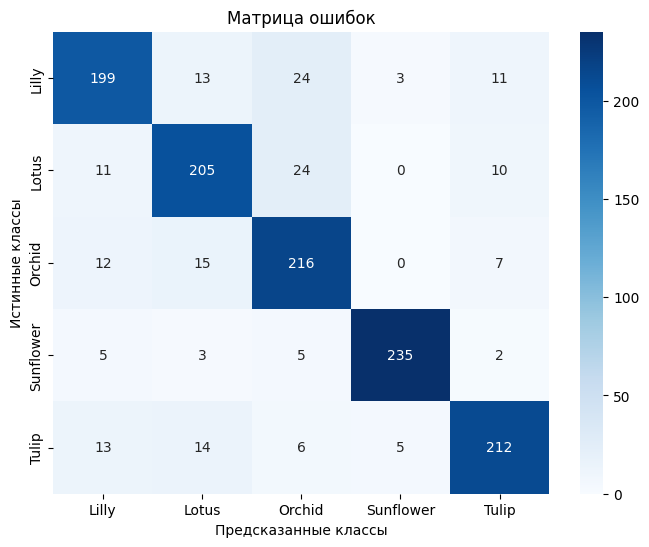

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = best_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Предсказанные классы")
plt.ylabel("Истинные классы")
plt.title("Матрица ошибок")
plt.show()

#### 7.3. Отобразим график обучения

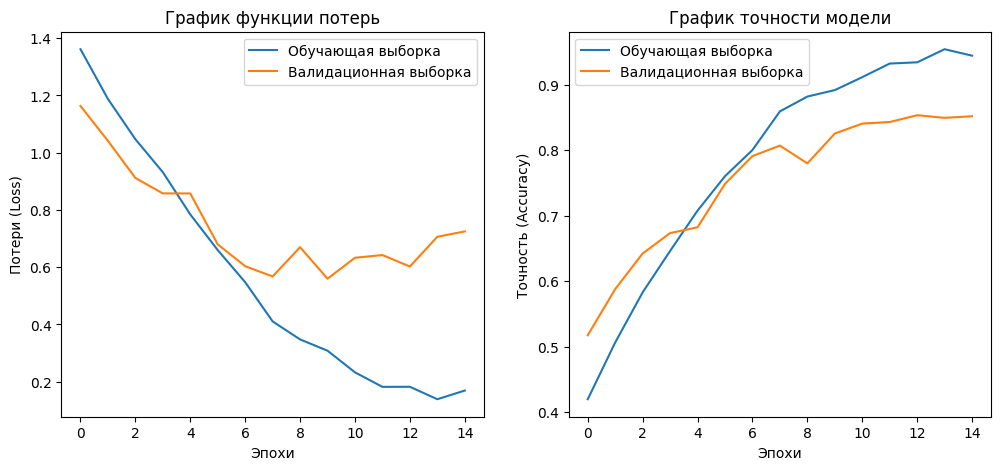

In [65]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Обучающая выборка")
plt.plot(val_loss, label="Валидационная выборка")
plt.xlabel("Эпохи")
plt.ylabel("Потери (Loss)")
plt.title("График функции потерь")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Обучающая выборка")
plt.plot(val_acc, label="Валидационная выборка")
plt.xlabel("Эпохи")
plt.ylabel("Точность (Accuracy)")
plt.title("График точности модели")
plt.legend()

plt.show()

### 8. Сохранение модели и меток классов:

In [66]:
best_model.save("flower_classification_model.h5")  # Сохраняем лучшую модель
print("Модель сохранена как 'flower_classification_model.h5'")


Модель сохранена как 'flower_classification_model.h5'


In [68]:
import pickle

with open("class_labels.pkl", "wb") as f:
    pickle.dump(class_names, f)

print("Метки классов сохранены в 'class_labels.pkl'")


Метки классов сохранены в 'class_labels.pkl'


### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [67]:
import numpy as np
import cv2
import pickle
from tensorflow.keras.models import load_model

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [69]:
def preprocess_image(image_path):
    image = cv2.imread(image_path)

    if image is None:
        raise ValueError(f"Ошибка: не удалось загрузить изображение {image_path}")

    image = cv2.resize(image, (128, 128))

    image = image.astype("float32") / 255.0

    image = np.expand_dims(image, axis=0)

    return image

print("Функция предобработки изображений готова!")


Функция предобработки изображений готова!


#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [70]:
def predict_image(image_path, model_path="flower_classification_model.h5", labels_path="class_labels.pkl"):

    model = load_model(model_path)

    with open(labels_path, "rb") as f:
        class_names = pickle.load(f)

    image = preprocess_image(image_path)

    predictions = model.predict(image)

    predicted_class_idx = np.argmax(predictions[0])

    confidence = predictions[0][predicted_class_idx] * 100

    predicted_class = class_names[predicted_class_idx]

    return f"🔹 Предсказанный класс: {predicted_class} (уверенность: {confidence:.2f}%)"

print("Функция предсказания готова!")


Функция предсказания готова!


### 10. Визуализируем интерфейс и произведем классификацию:

In [71]:
import gradio as gr

def gradio_predict(image):
    image_path = "temp_image.jpg"
    cv2.imwrite(image_path, image)

    result = predict_image(image_path)

    return result

gr_interface = gr.Interface(
    fn=gradio_predict,  # Функция предсказания
    inputs=gr.Image(type="numpy"),  # Входное изображение
    outputs="text",  # Текстовый вывод предсказания
    title="Классификация цветов",
    description="Загрузите изображение цветка, и модель предскажет его класс.",
    theme="default"
)

gr_interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2acdcbde1f4a93ceb6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
